In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import ee
import geemap

In [3]:
#ee.Authenticate()

In [4]:
ee.Initialize()

In [5]:
Map = geemap.Map()

In [6]:
os.environ["SATELLITE"] = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'

In [7]:
Map.add_basemap("HYBRID")

In [8]:
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# 1. Coeficientes de correlación

La correlación es una medida estadística que indica el grado de relación entre dos variables. En concreto, la correlación lineal sirve para determinar cuánto de correlacionadas linealmente están dos variables distintas.

Algunas características de la correlación son:

* Siempre toma valores entre -1 y 1
* Las relaciones positivas fuertes tienen valores cercanos a 1 (indican que son dirctamente proporcionales)
* Las relaciones negativas fuertes tienen valores cercanos a -1 (indican que son inversamente proporcionales)
* La relaciones débiles tienden a cero

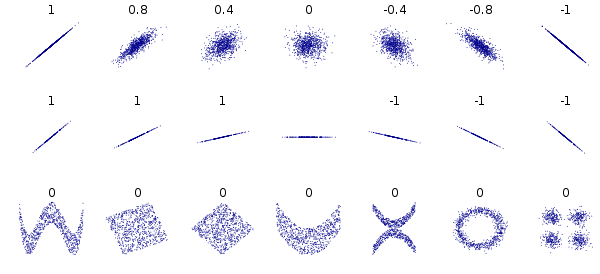

Matemáticamente las podemos definir como el cociente entre la covarianza de las variables y la raíz cuadrada del producto de la varianza de cada variable

$
\rho{XY}= \frac{Cov(X,Y)}{\sqrt{Var(X)*Var(Y)}}
$

Para medidas en una población la notación de la correlación se denota con la letra $\rho$, y para medidas en una muestra de la población, su notación se denota con la letra $r$.

La covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.

Este parámetro indica si existe dependencia entre ambas variables

$
Cov(XY)=\frac{1}{N} \sum_{i=1}^n \left(x_i - \bar x \right) \left(y_i - \bar y \right)
$

En el caso de que la covarianza sea muestral, esta se denota como $S_{XY}$

$
S_{XY}=\frac{1}{N-1} \sum_{i=1}^n \left(x_i - \bar x \right) \left(y_i - \bar y \right)
$

* Si la covarianza es mayor a 0, hay una relación positiva
* Si la covarianza es menor a 0, hay una relación negativa
* Si la covarianza es igual a 0, no hay relación entre las variables X e Y

En el caso de la varianza, esta es una medida de dispersión que indica la variabilidad de una variable aleatoria. Matemáticamente $Var(XY)$ se denota como $\sigma^2$ o $s^2$ para poblaciones o una muestra poblacional. 

$
Var(X)= \sigma^2 = \frac{1}{N} \sum_{i=1}^n (x_i - \bar x)^2
$

$
Var(Y)= \sigma^2 = \frac{1}{N} \sum_{i=1}^n (y_i - \bar y)^2
$

$
Var(X)= s^2 = \frac{1}{N-1} \sum_{i=1}^n (x_i - \bar x)^2
$

$
Var(Y)= s^2 = \frac{1}{N-1} \sum_{i=1}^n (y_i - \bar y)^2
$

Cuanto más grande sea el valor de la varianza, más dispersos están los datos. En caso contrario, cuanto más pequeño sea el valor de la varianza, menos dispersión habrá en la serie de datos.

# 2. La evapotranspiración para el desarrollo de esta actividad

La evapotranspiración hace referencia a la cantidad total de agua que se evapora y transpira de la superficie terrestre. Esta medida mezcla dos conceptos íntimamente ligados: (1) la evaporación del agua de la superficie del suelo, que hace referencia a la franja capilar por encima de la capa freática y a las masas de agua superficiales son componentes de la ella que se "evaporan";  (2) la evapotranspiración, la cual ocurre en las plantas como resultado de su proceso de transpiración.

La evapotranspiración se clasifica como evapotranspiración potencial ($ETP$) y evapotranspiración real ($ETR$). La primera es la evapotranspiración que se produciría si la humedad del suelo y la cobertura vegetal estuvieran en condiciones óptimas. La segunda, es la evapotranspiración que se produce realmente. Siempre la evapotranspiración potencial va ser mayor o igual que la evapotranspiración real.

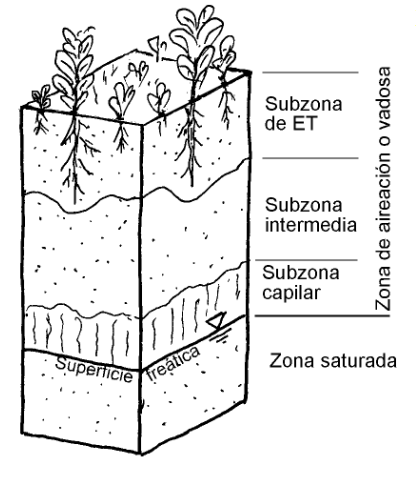

Existen varios métodos matemáticos para calcular la evapotranspiración potencial. Para este caso vamos a emplear la fórmula de Thornthwaite, definida como:

$
ETP = ETP_{sin corregir}*\frac{N}{12}*\frac{d}{30}
$

$
ETP_{sin corregir} = 16* \left(\frac{10*t}{I} \right)^a
$

$
I = \sum i
$

$
i = \left( \frac{t}{5}\right)^{1.514}
$

$
a = (675*10^{-9})*I^3 - (771*10^{-7})*I^2 + (1792*10^{-5})*I + 0.49239
$

$N$:número máximo de horas del sol, dependiendo del mes y de la latitud

$d$: número de días del més

$t$: temperatura media mensual ($°C$)

$I$: índice de calor anual

$i$: índice de calor mensual

$ETP_{sin corregir}$: evapotranspirtación potencial mensual sin corregir $\left(\frac{mm}{mes} \right)$

$ETP$: evapotranspiración potencial diaria $\left( \frac{mm}{día} \right)$

Para el caso de la evapotranspiración real, emplearemos la fórmula de Coutagne y Turc:

$
ETR = P - \chi * P^2
$

$
\chi = \frac{1}{0.8+0.14*t}
$

$t$: temperatura media anual ($°C$)

$P$: precipitación acumulada anual ($m$)

$ETR$: evapotranspiración real $\left( \frac{m}{año} \right)$

http://www.ideam.gov.co/documents/21021/21147/VALIDACION+DE+LAS+FORMULASDE+ETO+PARA+COLOMBIA/fd58c66b-3dfd-4997-b793-db35292127a7

https://hidrologia.usal.es/temas/Evapotransp.pdf

# 3. Adquisición de los datos para realizar una modelación de esta variable

In [9]:
#https://developers.google.com/earth-engine/datasets/catalog/NASA_FLDAS_NOAH01_C_GL_M_V001?hl=en#bands

In [10]:
datosClimaticos = ee.ImageCollection("NASA/FLDAS/NOAH01/C/GL/M/V001")

Nota: en el conjunto de datos climáticos, la precipitación y la evapotranspiración se representan en $kg/m^2 / s$

Tenga en cuenta que los $kg$ hacen referencia a la densidad del agua. Entonces $1kg$ serían $1000000 mm^3$ o $0.001 m^3$

In [11]:
Colombia = geemap.shp_to_ee("Col/gadm41_COL_0.shp")

In [12]:
Map.addLayer(Colombia,{},"Col")

In [13]:
Map

Map(bottom=812.0, center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [14]:
def cortarImagenes(img):
    return img.clip(Colombia)

# 4. Modelación de la ETR empírica

In [15]:
def ETR(imgCol,yyyy,mascara,shp):
    fechai = str(yyyy)+str("-01-01")
    fechaf = str(yyyy)+str("-12-31")
    filtro = imgCol.filterDate(fechai, fechaf).filterBounds(shp).map(mascara)

    def convertPrec(imgCol):
        return imgCol.select("Rainf_f_tavg").multiply(0.001).multiply(2592000).multiply(0.000001)
    
    def convertTemp(imgCol):
        return imgCol.select("Tair_f_tavg").subtract(273)
    
    precMes = imgCol.map(convertPrec)
    tempMes = imgCol.map(convertTemp)
    
    precAcumAn = precMes.sum()
    tempPromAn = tempMes.mean()

    x = (tempPromAn.multiply(0.14).add(0.8)).pow(-1)

    ETR_emp = precAcumAn.subtract(x.multiply(precAcumAn.pow(2)))
    return ETR_emp


In [16]:
ETreal = ETR(datosClimaticos, 2023, cortarImagenes,Colombia)

In [17]:
ETreal.getInfo()

{'type': 'Image',
 'bands': [{'id': 'Rainf_f_tavg',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [18]:
Map.addLayer(ETreal,{},"ETR")

In [19]:
Map

Map(bottom=812.0, center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [20]:
ETR_modelo = datosClimaticos.filterDate("2023-01-01","2023-12-31").mean().select("Evap_tavg").multiply(0.001).multiply(2592000).multiply(0.000001)

In [21]:
Map.addLayer(ETR_modelo,{},"ETR modelo")

In [22]:
Map

Map(bottom=812.0, center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [24]:
aoi = ee.FeatureCollection(Map.draw_last_feature)

In [26]:
array_modelo = geemap.ee_to_numpy(ee_object = ETR_modelo,
                          region = aoi, 
                          bands = ['Evap_tavg'])

In [27]:
array_estimado = geemap.ee_to_numpy(ee_object = ETreal,
                          region = aoi, 
                          bands = ['Rainf_f_tavg'])

In [28]:
ET_df = pd.DataFrame({"etr_modelo":array_modelo.flatten(), "etr_estimado":array_estimado.flatten()})

In [29]:
ET_df

,etr_modelo,etr_estimado
0,9.498774e-08,0.000077
1,1.101472e-07,0.000077
2,1.136827e-07,0.000068
3,1.243666e-07,0.000119
4,1.232873e-07,0.000120
5,1.263524e-07,0.000109
6,1.239896e-07,0.000115
7,1.016574e-07,0.000162
8,1.007216e-07,0.000085
9,1.237543e-07,0.000070


In [ ]:
ET_df.corr()

,etr_modelo,etr_estimado
etr_modelo,1.000000,0.142825
etr_estimado,0.142825,1.000000
